In [1]:
library(data.table)
library(plyr)
library(tidyverse)
library(forecast)
library(lmtest)
library(ggplot2)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ dplyr::between()   masks data.table::between()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
✖ purrr::transpose() masks data.table::transpose()
Loading required package: zoo

Atta

In [5]:
getwd()

[1] "/Users/Ryan/Desktop/datareach/disease prediction"

In [11]:
#read in the cleaned data file
data <- read_csv('comb.csv', col_names=FALSE)

Parsed with column specification:
cols(
  .default = col_integer(),
  X1 = col_character(),
  X2 = col_character(),
  X25 = col_double()
)
See spec(...) for full column specifications.


In [14]:
(data)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210
ADAMAOUA,BANKIM,1,0,7,2,7,1,1,4,⋯,NA,NA,0,8,15,0,0,5,2,7
ADAMAOUA,BANYO,0,NA,2,NA,5,0,1,0,⋯,NA,7,13,0,22,3,13,14,3,NA
ADAMAOUA,DJOHONG,3,4,1,2,0,0,1,1,⋯,18,1,0,6,17,0,0,2,2,12
ADAMAOUA,MEIGANGA,2,0,2,0,NA,1,0,4,⋯,0,0,0,0,0,0,0,0,7,NA
ADAMAOUA,NGAOUNDAL,2,9,0,0,5,0,0,6,⋯,12,11,16,26,0,31,17,20,NA,18
ADAMAOUA,NGAOUNDERE RURAL,84,79,59,78,53,43,72,64,⋯,106,213,96,122,119,69,92,70,104,73
ADAMAOUA,NGAOUNDERE URBAIN,55,72,95,76,116,88,102,92,⋯,124,169,120,89,77,69,77,59,81,77
ADAMAOUA,TIBATI,7,15,9,12,14,10,12,4,⋯,14,12,69,45,18,15,31,30,24,16
ADAMAOUA,TIGNERE,27,0,27,27,17,4,14,0,⋯,38,23,29,25,47,47,38,28,26,25
CENTRE,AKONOLINGA,0,1,0,2,1,0,0,0,⋯,1,8,6,2,7,10,7,5,11,1


In [18]:
#convert data to numerical type
cols = c(3:210)
data[,cols] = lapply(data[,cols], function(x) as.numeric(x))

In [21]:
data1 <- data

In [20]:
## replace NA with row means
#data_noNA <- cbind(data)
#for ( r in 1:nrow(data) ){
#    data_noNA[r, is.na(data[r,])] <- rowMeans(data[r,cols], na.rm = 1)
#}

In [22]:
# replace NA with mean of predecessor and follower
N <- nrow(data1)
data_noNA <- as.tibble(cbind(data1))
for ( r in 1:N ){
    for ( c in cols ){
        #if (c==147) c
        if (is.na(data1[r,c])){
            # find the prev
            has_prev <- FALSE
            for (i in c:3){
                if (!is.na(data[r,i])){
                    has_prev <- TRUE
                    prev <- data1[r,i]
                    break
                }
            } 
            # find post
            has_post <- FALSE
            for (j in c:210){
                if (!is.na(data1[r,j])){
                    has_post <- TRUE
                    post <- data1[r,j]
                    break
                }
            }
            data_noNA[r,c] <- 0
            if (has_prev){
                data_noNA[r,c] <- data_noNA[r,c]+prev
            }
            if (has_post){
                data_noNA[r,c] <- (data_noNA[r,c]+post)/(1+has_prev)
            }
        } 
    }
}

In [25]:
#an example of elimination of NA
r = 4
data_noNA[r,]
data1[r,]

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210
ADAMAOUA,MEIGANGA,2,0,2,0,0.5,1,0,4,⋯,0,0,0,0,0,0,0,0,7,7


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210
ADAMAOUA,MEIGANGA,2,0,2,0,NA,1,0,4,⋯,0,0,0,0,0,0,0,0,7,NA


In [26]:
any(is.na(data_noNA))
data_noNA

[1] FALSE

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210
ADAMAOUA,BANKIM,1,0,7,2.0,7.0,1,1,4,⋯,3.5,3.5,0,8,15,0,0,5,2,7
ADAMAOUA,BANYO,0,1,2,3.5,5.0,0,1,0,⋯,9.0,7.0,13,0,22,3,13,14,3,3
ADAMAOUA,DJOHONG,3,4,1,2.0,0.0,0,1,1,⋯,18.0,1.0,0,6,17,0,0,2,2,12
ADAMAOUA,MEIGANGA,2,0,2,0.0,0.5,1,0,4,⋯,0.0,0.0,0,0,0,0,0,0,7,7
ADAMAOUA,NGAOUNDAL,2,9,0,0.0,5.0,0,0,6,⋯,12.0,11.0,16,26,0,31,17,20,19,18
ADAMAOUA,NGAOUNDERE RURAL,84,79,59,78.0,53.0,43,72,64,⋯,106.0,213.0,96,122,119,69,92,70,104,73
ADAMAOUA,NGAOUNDERE URBAIN,55,72,95,76.0,116.0,88,102,92,⋯,124.0,169.0,120,89,77,69,77,59,81,77
ADAMAOUA,TIBATI,7,15,9,12.0,14.0,10,12,4,⋯,14.0,12.0,69,45,18,15,31,30,24,16
ADAMAOUA,TIGNERE,27,0,27,27.0,17.0,4,14,0,⋯,38.0,23.0,29,25,47,47,38,28,26,25
CENTRE,AKONOLINGA,0,1,0,2.0,1.0,0,0,0,⋯,1.0,8.0,6,2,7,10,7,5,11,1


In [27]:
five_week_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 5*corr
}
return(score)
}

In [28]:
five_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 10.0/(abs(lag)+1)*corr
}
return(score)
}

In [29]:
### source: http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode39.html
### source: https://stackoverflow.com/questions/15551209/cross-correlation-using-ccf-in-r
calc_upperCI <- function(T, confidence){
    CI <- qnorm((1 + confidence)/2)/sqrt(T)
    return (CI)
}

In [30]:
two_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -2:2){
    corr <- CrossCorr[lag][[1]]
    score <- score + 15.0/(abs(lag)+1)*corr
}
return(score)
}

, , 1

         [,1]
[1,] 9.766576

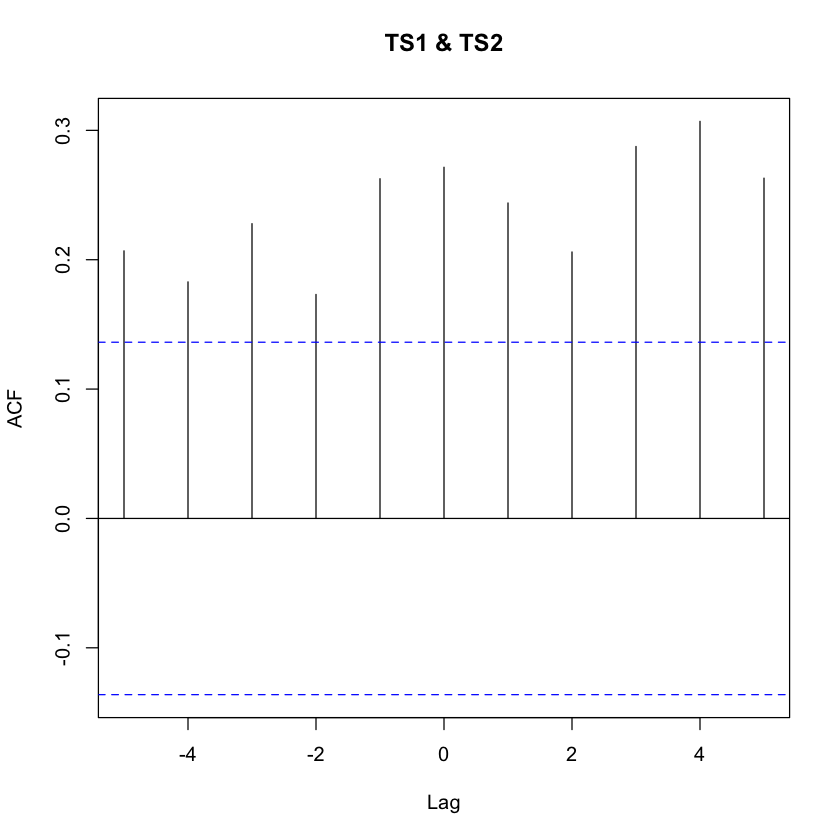

In [31]:
# example
TS1<-ts(as.numeric(data_noNA[80, 4:ncol(data_noNA)])) 
TS2<-ts(as.numeric(data_noNA[84, 4:ncol(data_noNA)]))
CrossCorr<-ccf(TS1, TS2, lag = 5, pl = TRUE)
two_week_weighted_sum(CrossCorr)

In [32]:
score_mat <- matrix(nrow=N, ncol=N)
# the (i,j) entry of score mat correspond to ccf(i,j)
for (i in 1:N){
    for (j in 1:N){
        if (j > i){
        TS1<-as.ts(as.numeric(data_noNA[i, 4:ncol(data_noNA)])) 
        TS2<-as.ts(as.numeric(data_noNA[j, 4:ncol(data_noNA)]))
        CrossCorr<-ccf(TS1, TS2, lag = 5, pl = FALSE)
        score_mat[i,j] <- two_week_weighted_sum(CrossCorr)
        }
    }
}

In [33]:
score_mat

NA,0.3864767,1.608385,3.860944,5.085531,1.444379,5.16999403,0.1471605,2.9908716,1.692270,⋯,-4.1923115,-5.10774496,-3.67048479,1.2445546,-1.8566483,1.2947720,-6.60771142,-5.03757502,3.39588839,-2.3229473
NA,NA,4.027262,-1.678491,6.431877,9.926848,0.03067035,3.8744090,11.0115718,7.551250,⋯,-1.8965898,-1.45514480,-4.02707541,0.5393866,-6.1201028,-5.0877257,-6.05185187,2.46151333,-1.61484422,-5.6765342
NA,NA,NA,-1.149188,4.954868,3.287864,-1.16275682,2.5986477,0.5963134,1.826969,⋯,0.2516173,-2.02843979,-2.08080732,1.2789142,-4.4282312,-4.8284746,-0.90814309,0.91105763,-1.87099543,-3.8426680
NA,NA,NA,NA,5.608083,1.680594,-0.68155751,0.6057792,-0.1457706,3.129343,⋯,0.2603138,0.74440162,3.65965695,2.9169990,-1.8372111,2.3954656,1.31418793,0.43630231,3.58881904,-4.8942863
NA,NA,NA,NA,NA,4.764226,-5.94982866,4.0378750,4.8712888,9.228044,⋯,-5.1852995,-2.71641781,-2.24122589,-0.4679157,-7.5584127,-7.9156527,-5.10205374,-2.21596644,2.30307640,-6.2418602
NA,NA,NA,NA,NA,NA,10.33222008,5.9365238,9.9716696,7.227354,⋯,5.4395604,7.41819530,-1.37823128,-3.6243692,-1.8365049,0.3298429,1.24230379,3.91941631,-0.31485367,-6.4126339
NA,NA,NA,NA,NA,NA,NA,4.4189440,6.4769082,-2.128019,⋯,3.9138738,3.85900552,-2.79423080,-4.5023712,6.6466712,4.2497140,1.48031530,1.32910212,-0.85894203,-1.6112037
NA,NA,NA,NA,NA,NA,NA,NA,1.1340049,2.284824,⋯,-1.9604446,-0.86837025,-1.04624953,-2.5785360,-3.1677807,-5.9170026,-2.05927954,-2.31334446,1.94769167,-3.6706546
NA,NA,NA,NA,NA,NA,NA,NA,NA,4.716226,⋯,-3.0346159,2.64765252,-4.46279641,-3.9707306,0.4381381,0.1219715,-0.34570991,1.42022611,-2.30707704,-4.0828007
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,-2.2114563,-0.01786455,-3.06326352,-3.0557461,-6.6407666,-3.7403888,-3.36876772,-1.35196001,1.35131795,-4.2306971
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,-4.2944358,1.16717154,-0.04550476,-1.6371320,-5.9033454,-5.4259172,2.94994065,-4.17901633,2.00500903,-5.2405296


In [34]:
process_scores<- function(score_mat){
    # summary stats of scores
    scores = c(score_mat)
    print(summary(scores))
    print ( c("Mean: ",mean(scores,na.rm = TRUE)) )
    print( c("SD: ",sd(scores,na.rm = TRUE)) )
    hist(scores,
         breaks=50, freq=FALSE,
         main="Histogram of Correlation Scores",
         xlab="Correlation Score",
         col="steelblue")
    # heatmap of score matrix
    melted_score = melt(score_mat, na.rm = TRUE) 
    colnames(melted_score) <- c("Region1", "Region2", "Score")
    ggplot(data=melted_score, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile(colour="white") +
    scale_fill_gradient2(low = "#a6611a", high = "#018571", mid = "#f5f5f5", midpoint = 0)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-21.212  -1.583   0.661   1.144   3.660  23.355   19790 
[1] "Mean: "           "1.14353836353523"
[1] "SD: "             "4.45329524099265"


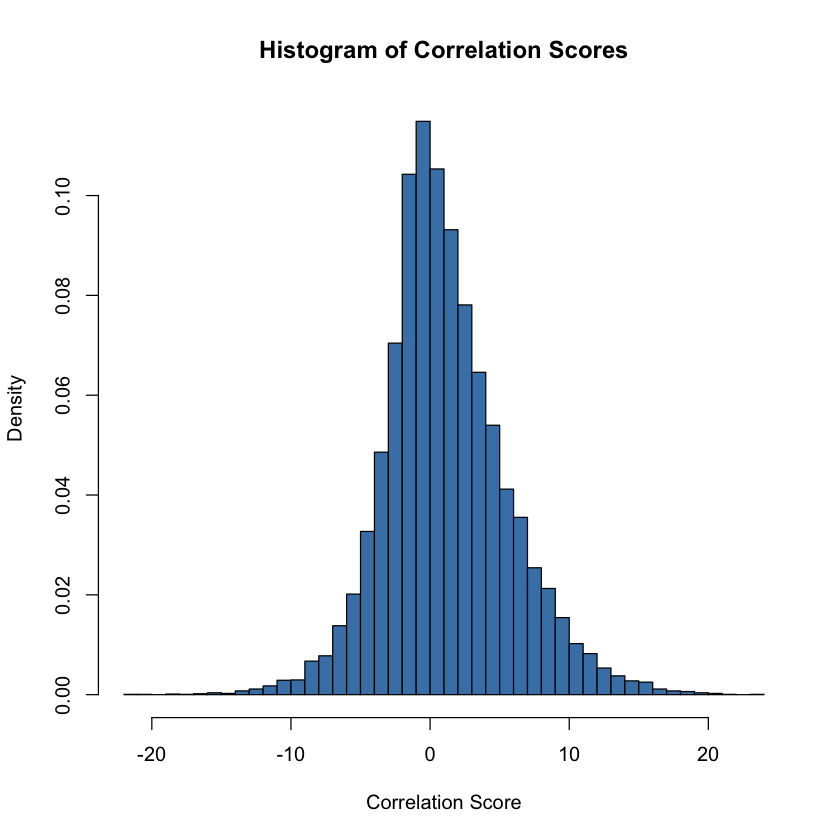

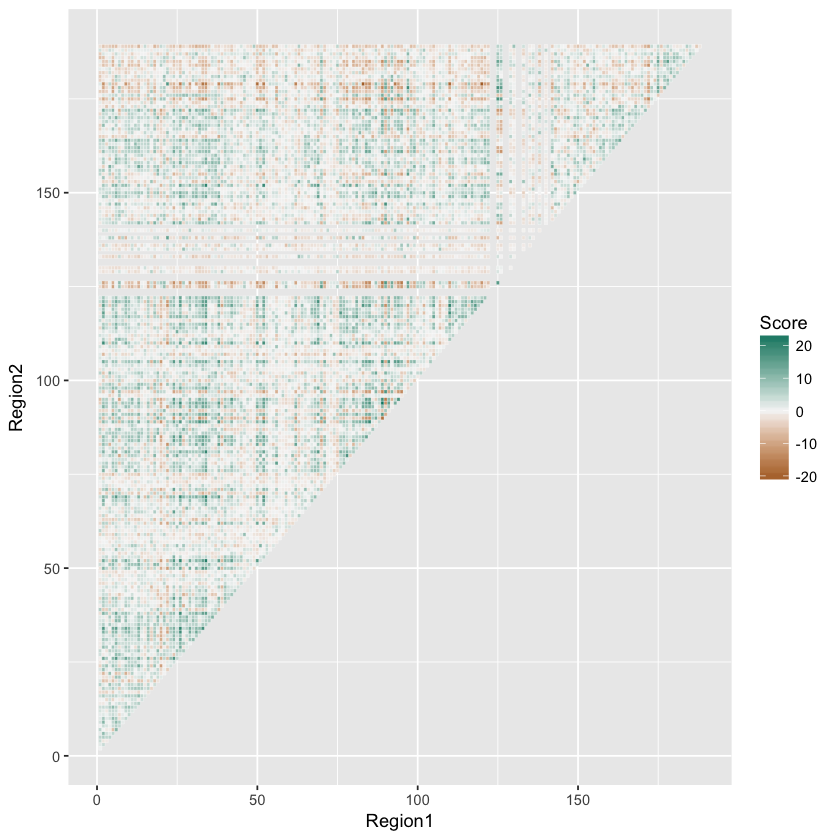

In [35]:
################
# ten-week sum #
################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-21.212  -1.583   0.661   1.144   3.660  23.355   19790 
[1] "Mean: "           "1.14353836353523"
[1] "SD: "             "4.45329524099265"


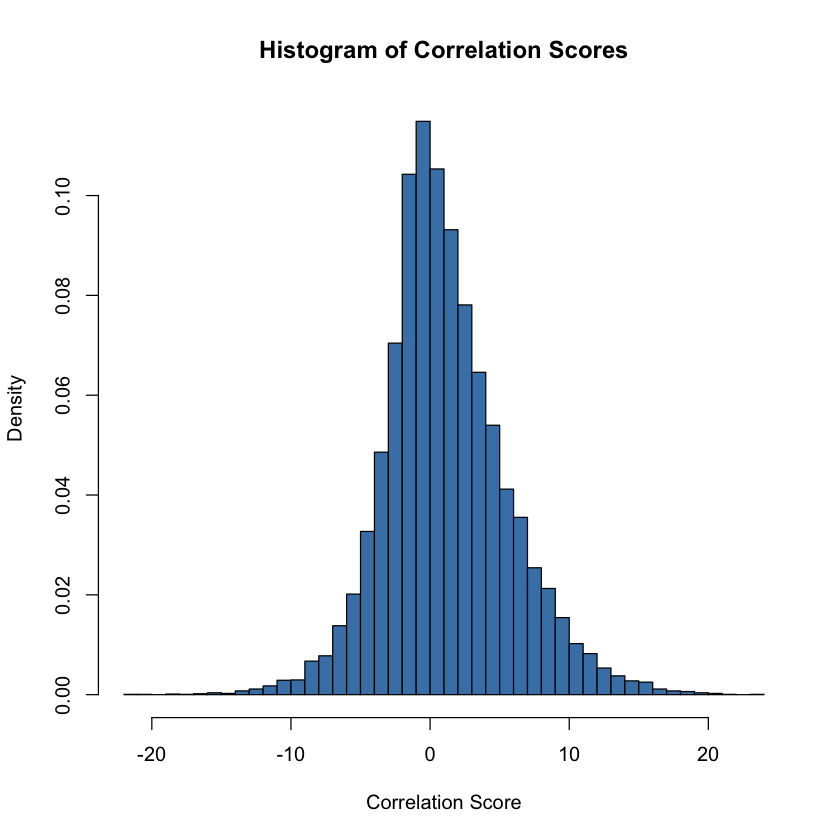

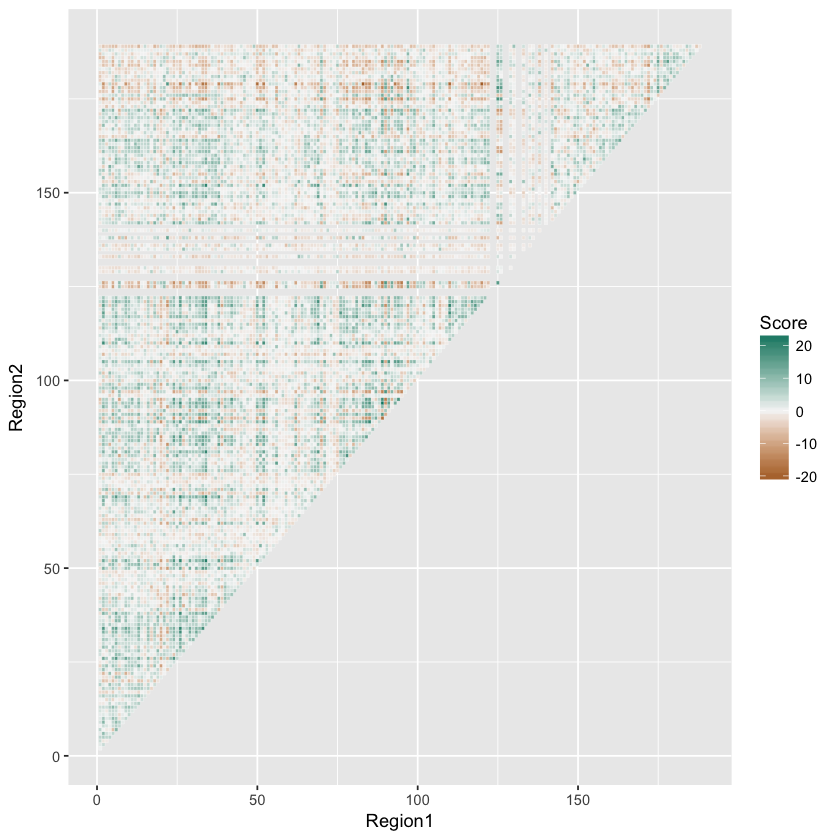

In [36]:
#########################
# ten-week weighted sum #
#########################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-21.212  -1.583   0.661   1.144   3.660  23.355   19790 
[1] "Mean: "           "1.14353836353523"
[1] "SD: "             "4.45329524099265"


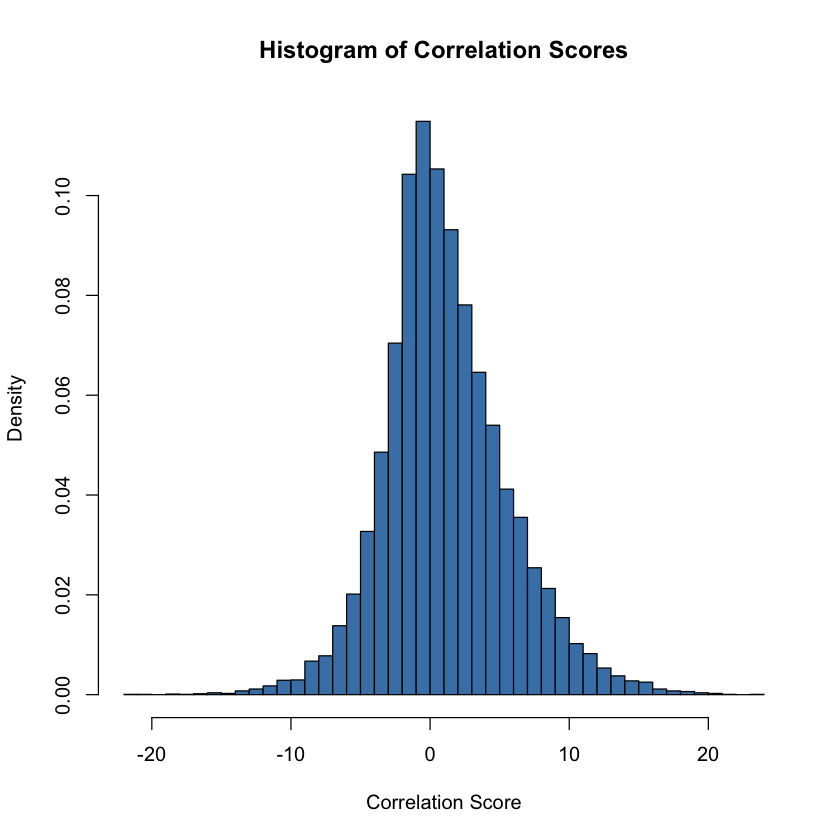

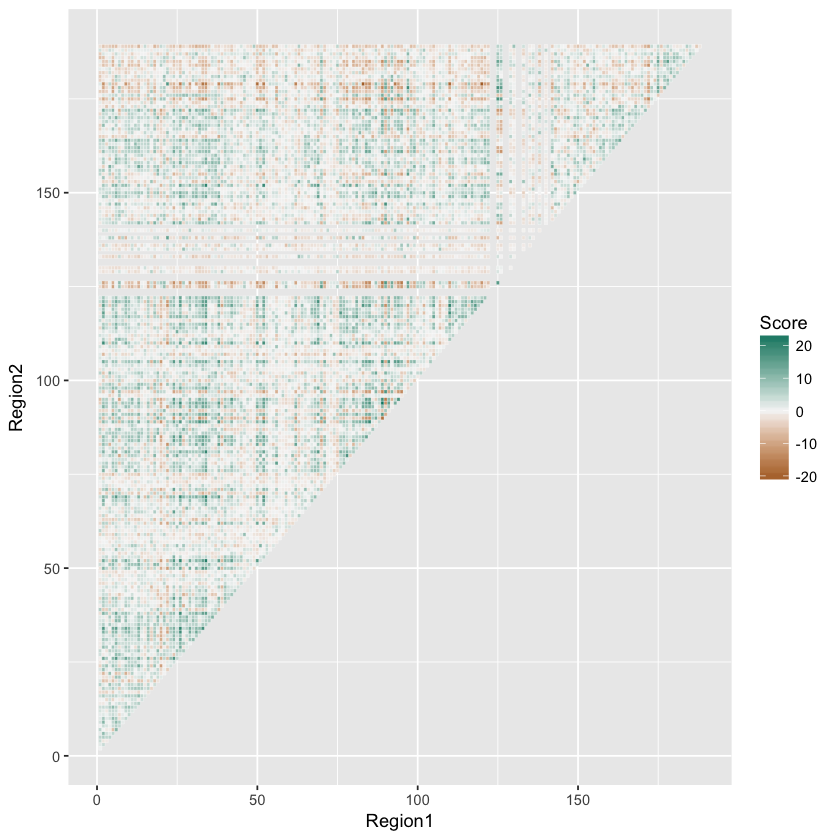

In [37]:
#########################
# two-week weighted sum #
#########################
process_scores(score_mat)

In [38]:
# Given two indices, plot their corrsponding time series
# if ccf_disp is TRUE, also plot the output graph of ccf function
visualize_corr <- function(index1, index2, ccf_disp=FALSE){
TS1<-ts(as.numeric(data_noNA[index1, 4:ncol(data_noNA)])) 
TS2<-ts(as.numeric(data_noNA[index2, 4:ncol(data_noNA)]))

ts.plot(TS1, TS2,
       gpars=list(xlab="Week", ylab="Cases", col=c("red","blue")))
legend("topleft",legend=c( paste(toString(index1),index2region(index1)), paste(toString(index2),index2region(index2))),
       col=c("red", "blue"),lty=c(1,1))

CrossCorr<-ccf(TS1, TS2, lag = 5, pl = ccf_disp)
score <- five_week_weighted_sum(CrossCorr)[[1]]
    
title(sub = paste( "Correlation Score =",toString(score) ))
if (ccf_disp){
    upperCI <- calc_upperCI(CrossCorr$n.used, 0.95)
    lowerCI <- -upperCI
    # verify CI
    lags <- -5:5
    my_upperCI <- rep(upperCI,11)
    points(lags, my_upperCI, col = "red")
    my_lowerCI <- rep(lowerCI,11)
    points(lags, my_lowerCI, col = "red")
    }
}

In [39]:
# Given a score matrix, and an interger k
# visualize_corr for top/bottom k scores(depending on the value of top)
# in the increasing order of scores
# ccf_disp dictates if the output graph of ccf is displayed
visualize_top_k <- function(score_mat, k, top=TRUE, ccf_disp=FALSE){
    sorted_scores = sort(c(score_mat))
    bottom_k = sorted_scores[1:k]
    top_k = tail(sorted_scores,k)
    if (top) {
        for (score in top_k){
            index_pair = which(score_mat == score, arr.ind = TRUE)
            visualize_corr(index_pair[1],index_pair[2],ccf_disp)
        }
    }
    else {
        for (score in bottom_k){
            index_pair = which(score_mat == score, arr.ind = TRUE)
            visualize_corr(index_pair[1],index_pair[2],ccf_disp)
        }
    }
}

In [40]:
index2region <- function(index){
    return( paste(data_noNA[index,3],data_noNA[index,2],sep=",") )
}

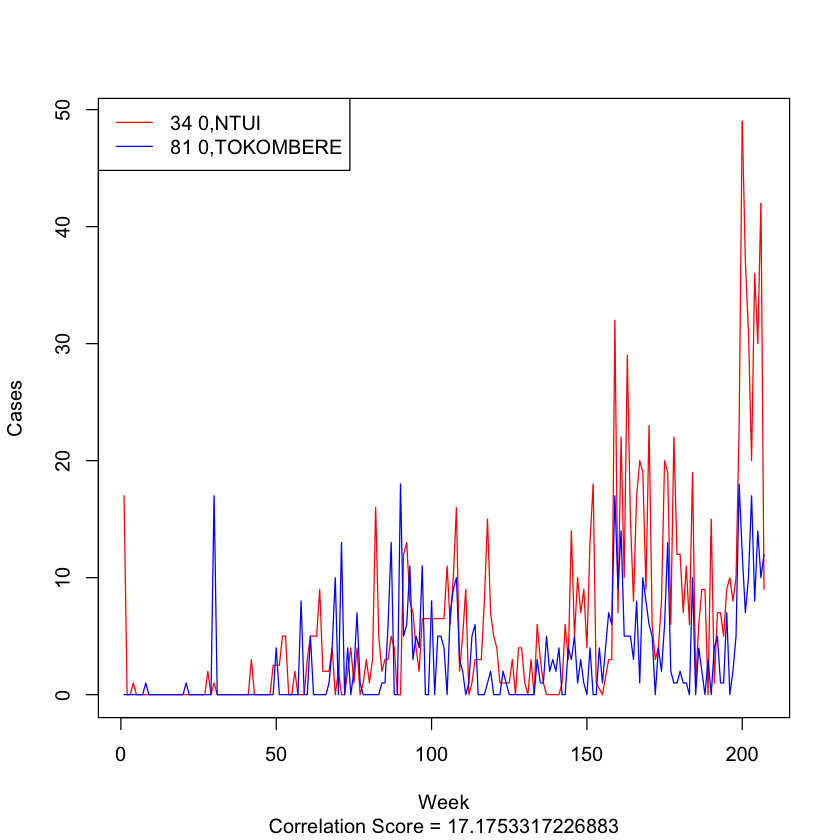

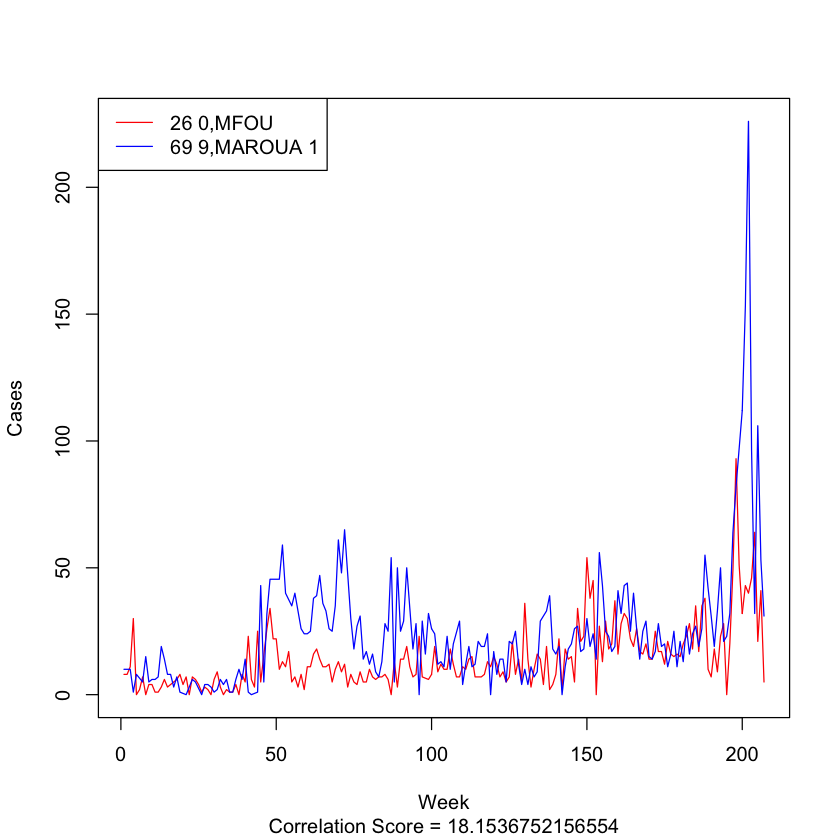

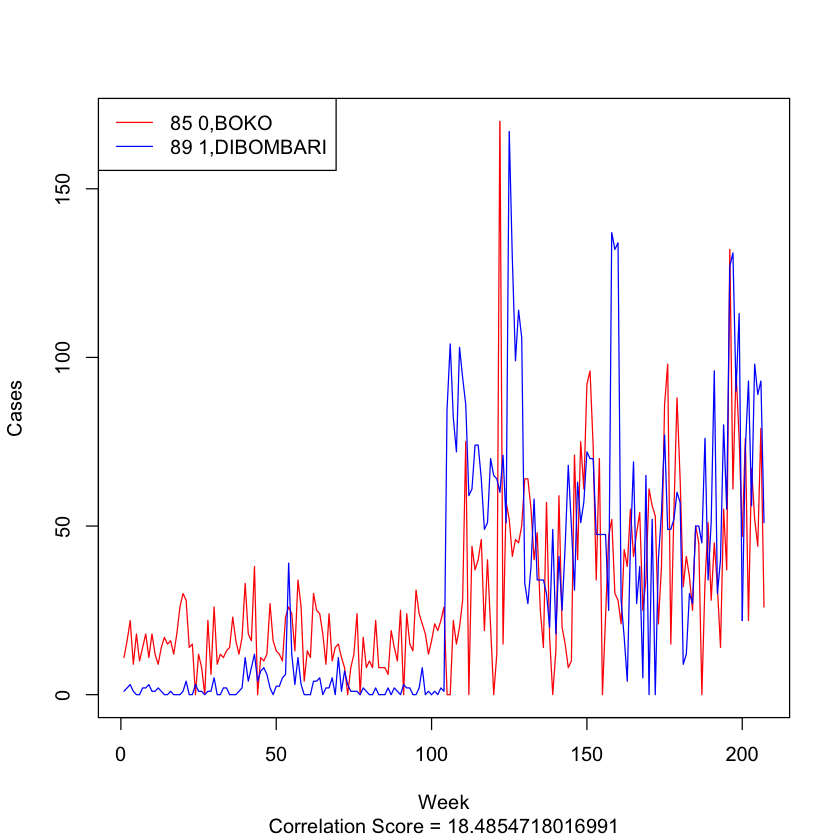

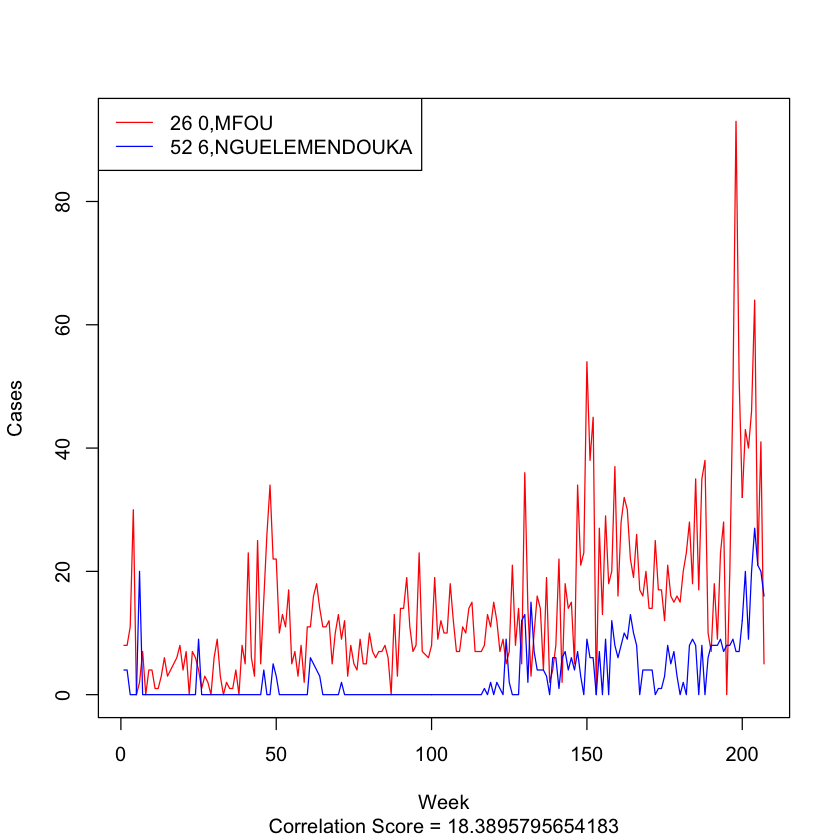

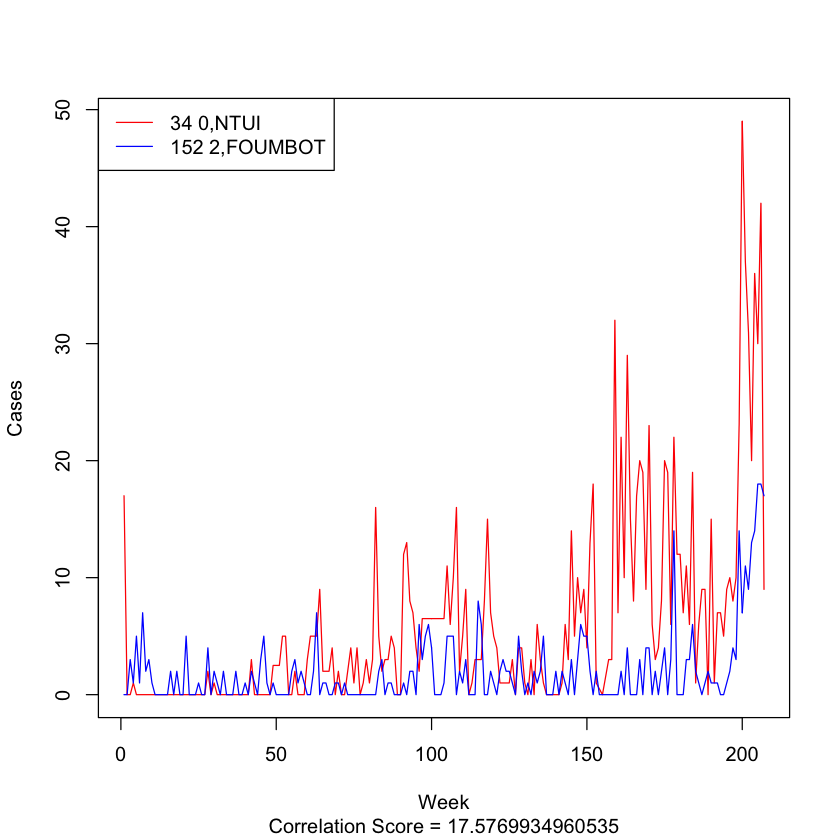

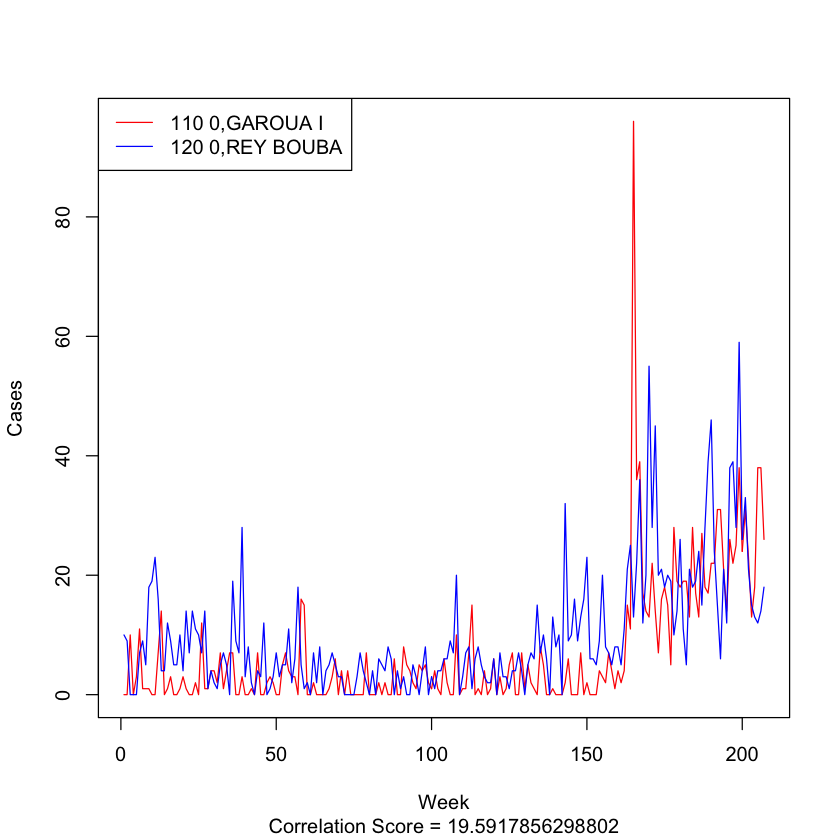

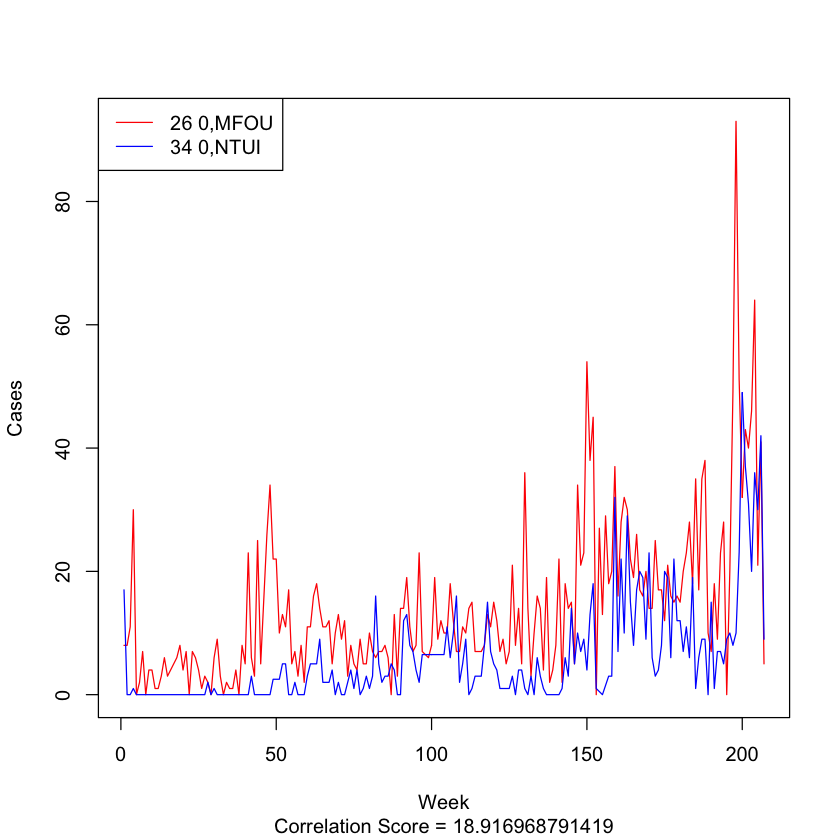

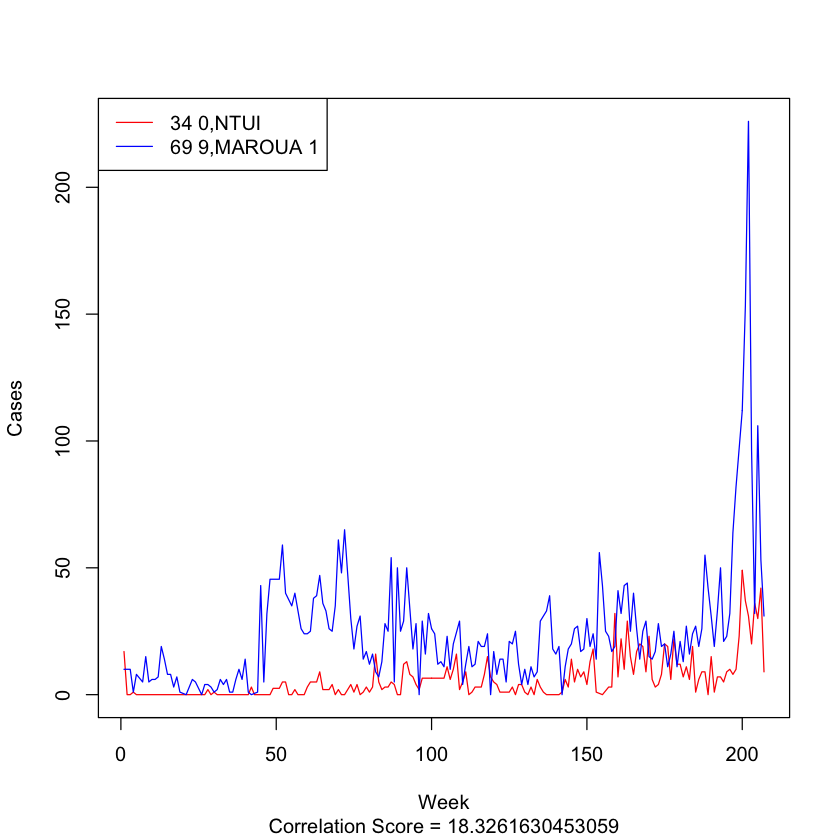

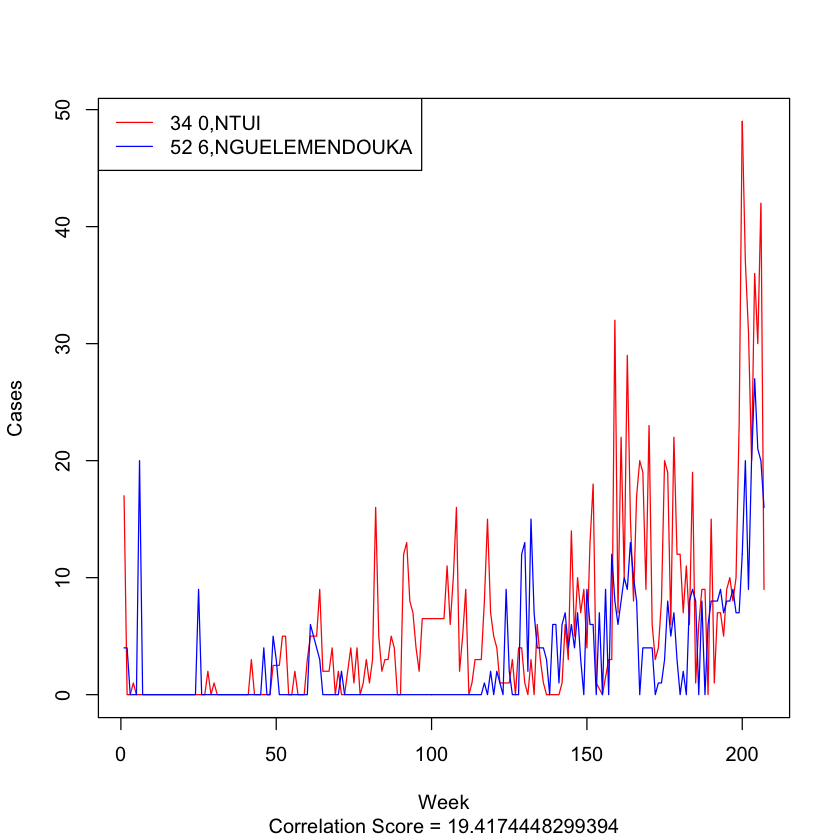

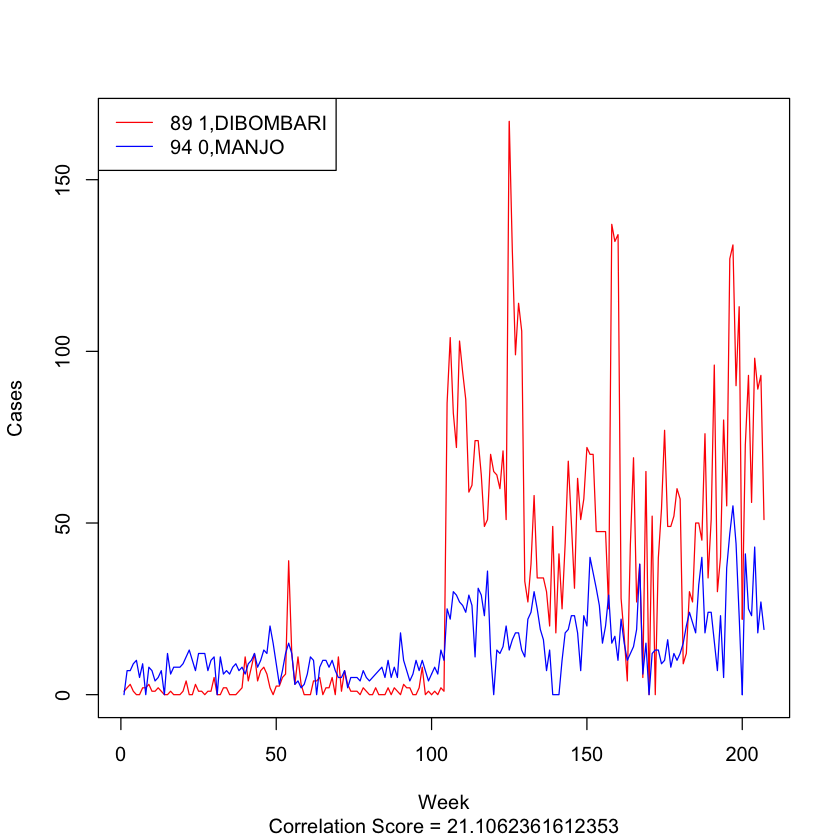

In [41]:
# visulization for top 10 scores (region pairs)
visualize_top_k(score_mat,10,top=TRUE,ccf_disp=FALSE)